In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.python.keras.callbacks import TensorBoard
from keras.initializers import Initializer
from time import time
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("/content/94_character_TMNIST.csv")

In [3]:
df["labels"].unique()

array(['6', 'D', 'f', '/', 'F', 'x', 'J', '8', 'H', 'k', '@', '1', '=',
       'g', ')', '2', 'd', '^', '3', 't', '#', '.', '4', 'o', '"', 'y',
       'A', 'u', 'G', '-', 'm', 'W', '&', 'c', '9', 'N', ']', 'P', 'X',
       '|', '}', 'h', '7', 'j', '5', '>', '?', 'b', '*', 'w', 'l', '0',
       '$', 'I', 'Y', '%', ':', 'T', 'K', 'E', '<', 'V', '{', 'M', 'S',
       'a', 'i', 'r', "'", 'p', ';', '[', '+', 'e', 'U', '(', 's', '~',
       ',', 'C', 'q', '_', 'n', 'B', 'z', 'v', 'O', 'R', '`', 'Z', 'Q',
       'L', '!', '\\'], dtype=object)

In [4]:
df["names"].nunique()

2990

In [5]:
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.shape

(274093, 786)

In [6]:
y = df["labels"]
x = df.drop(['names','labels'], axis=1)

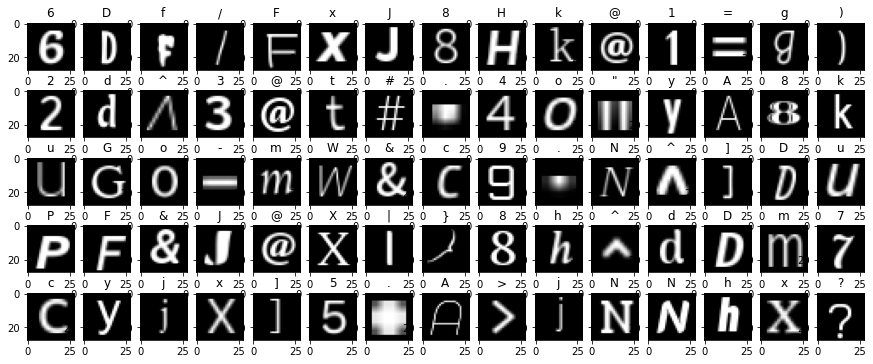

In [8]:
plt.figure(figsize=(15, 6))
for i in range(75):  
  plt.subplot(5,15,i+1)
  plt.title(y.iloc[i])
  plt.imshow(x.values[i].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()

In [7]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.25, random_state=42,stratify=y)

Text(0, 0.5, 'Count')

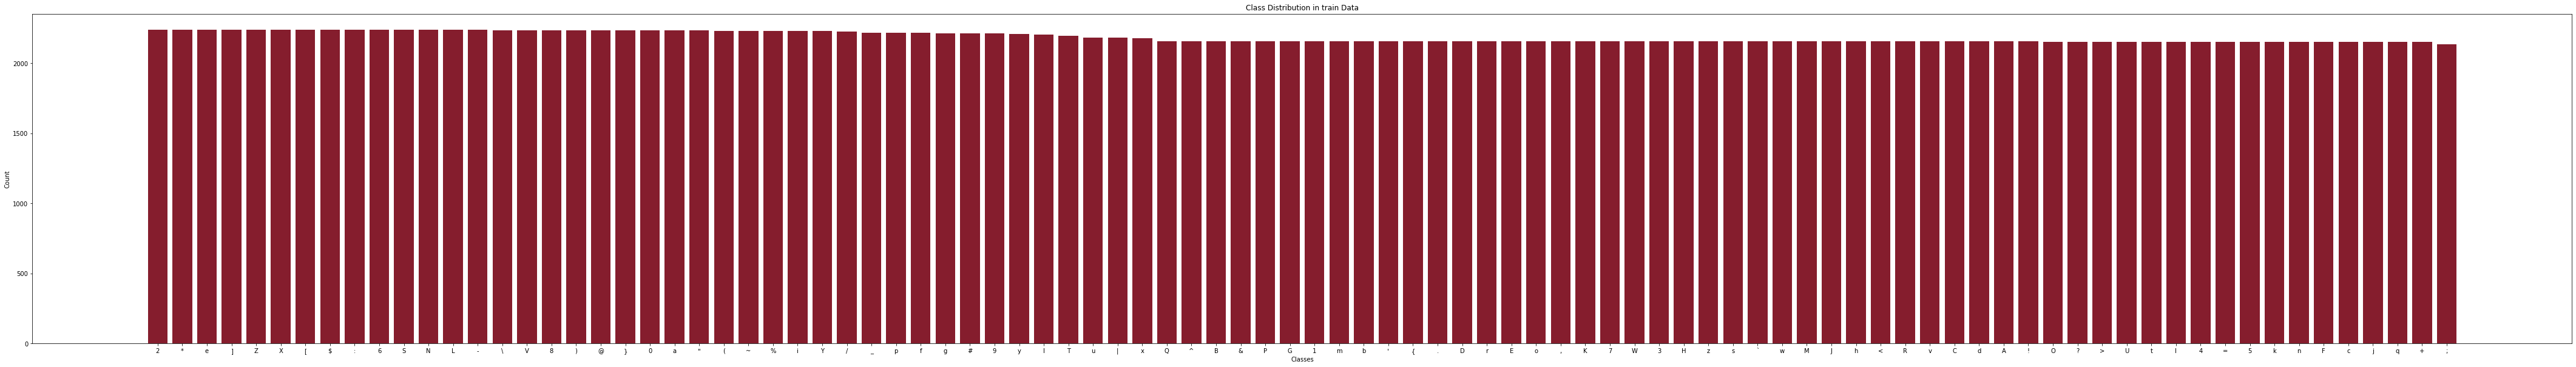

In [10]:
plt.figure(figsize=(75, 10))
plt.bar(y_train.unique(),y_train.value_counts(),color='#851D2D')
plt.title('Class Distribution in train Data')
plt.xlabel('Classes')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

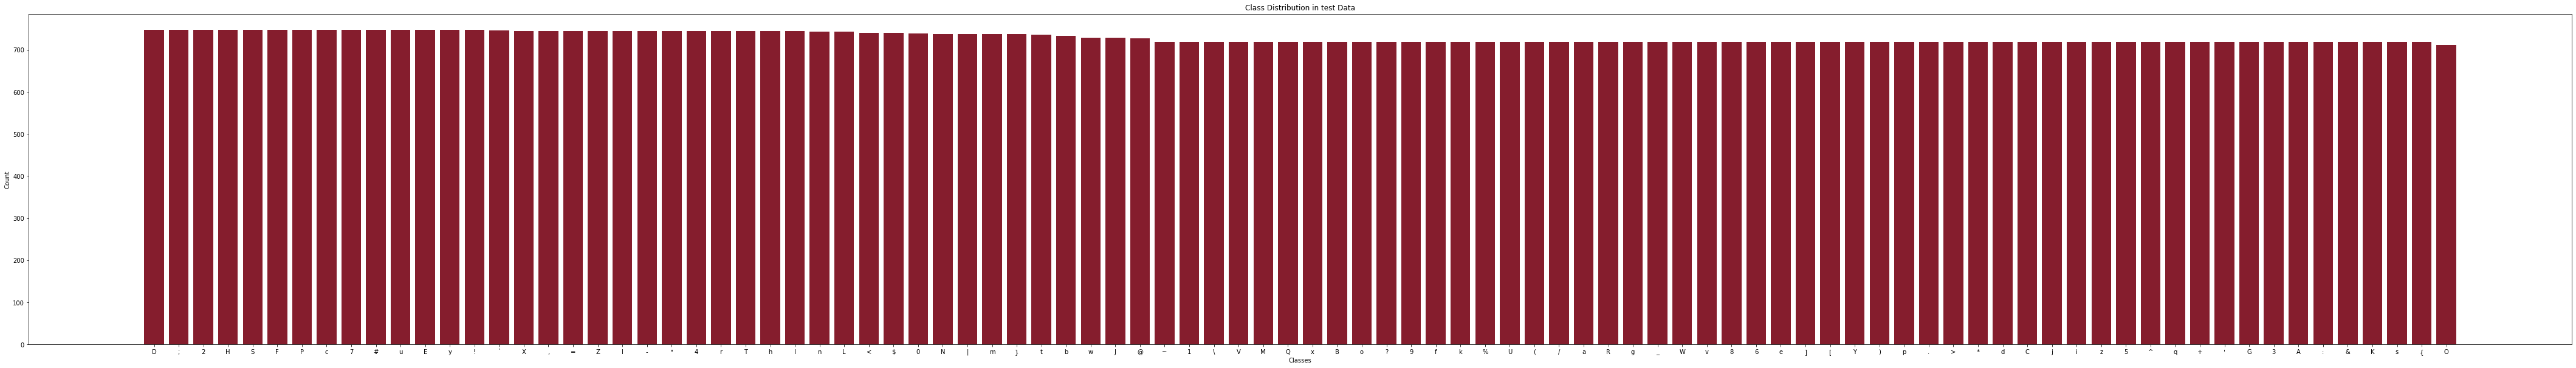

In [11]:
plt.figure(figsize=(75, 10))
plt.bar(y_test.unique(),y_test.value_counts(),color='#851D2D')
plt.title('Class Distribution in test Data')
plt.xlabel('Classes')
plt.ylabel('Count')

In [8]:
x_train= (x_train.astype('float32'))/255.0
x_test = (x_test.astype('float32'))/255.0

In [9]:
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
y_train_encoded=enc.fit_transform(y_train.values.reshape(-1,1))
y_test_encoded= enc.transform(y_test.values.reshape(-1,1))

In [10]:
x_train_norm=x_train.values.reshape(x_train.shape[0],28,28)
x_test_norm=x_test.values.reshape(x_test.shape[0],28,28)

In [15]:
model_A = Sequential()
model_A.add(Flatten(input_shape=(28,28)))
model_A.add(Dense(512,activation='relu'))
model_A.add(Dense(128,activation='relu'))
model_A.add(Dense(32, activation='relu'))
model_A.add(Dense(df["labels"].nunique(), activation='softmax'))
model_A.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model_A.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 94)                3102      
                                                                 
Total params: 474,814
Trainable params: 474,814
Non-trainable params: 0
_________________________________________________________________


In [16]:
tensorboard_A = TensorBoard(log_dir = 'Visualisation/{}'.format('ModelA'+ str(time())))

In [17]:
model_history_A=model_A.fit(x_train_norm, y_train_encoded, epochs=20, validation_data=(x_test_norm, y_test_encoded),
                        verbose=1,batch_size=128, callbacks = tensorboard_A)


Epoch 1/20
1607/1607 [==============================] - 10s 5ms/step - loss: 0.8237 - accuracy: 0.7851 - val_loss: 0.5091 - val_accuracy: 0.8472
Epoch 2/20
1607/1607 [==============================] - 7s 4ms/step - loss: 0.4477 - accuracy: 0.8632 - val_loss: 0.4433 - val_accuracy: 0.8634
Epoch 3/20
1607/1607 [==============================] - 7s 4ms/step - loss: 0.3784 - accuracy: 0.8798 - val_loss: 0.3757 - val_accuracy: 0.8839
Epoch 4/20
1607/1607 [==============================] - 7s 4ms/step - loss: 0.3328 - accuracy: 0.8913 - val_loss: 0.3578 - val_accuracy: 0.8875
Epoch 5/20
1607/1607 [==============================] - 7s 4ms/step - loss: 0.2990 - accuracy: 0.9002 - val_loss: 0.3436 - val_accuracy: 0.8905
Epoch 6/20
1607/1607 [==============================] - 7s 4ms/step - loss: 0.2711 - accuracy: 0.9080 - val_loss: 0.3397 - val_accuracy: 0.8931
Epoch 7/20
1607/1607 [==============================] - 7s 4ms/step - loss: 0.2513 - accuracy: 0.9134 - val_loss: 0.3306 - val_accuracy

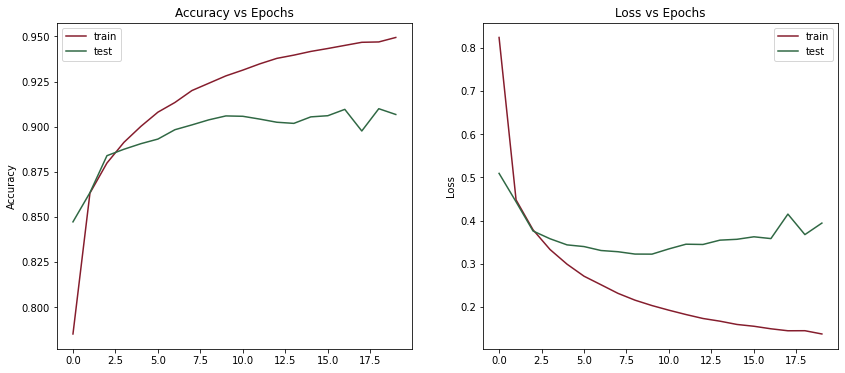

In [18]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(20)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history_A.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history_A.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history_A.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history_A.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.show()

In [19]:
model_B = Sequential()
model_B.add(Conv2D(128, (5, 5), activation='relu', input_shape=(28, 28,1)))
model_B.add(MaxPooling2D((2, 2)))

model_B.add(Conv2D(64, (3, 3), activation='relu'))
model_B.add(MaxPooling2D((2, 2)))

model_B.add(Flatten())
model_B.add(Dense(64, activation='relu'))
model_B.add(Dense(32, activation='relu'))
model_B.add(Dense(df["labels"].nunique(), activation='softmax'))

opt = Adam()
model_B.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_B.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [20]:
x_train_norm=x_train_norm.reshape((x_train_norm.shape[0],28,28,1))
x_test_norm=x_test_norm.reshape((x_test_norm.shape[0],28,28,1))

In [21]:
tensorboard_B = TensorBoard(log_dir = 'Visualisation/{}'.format('ModelB'+ str(time())))

In [22]:
model_history_B=model_B.fit(x_train_norm, y_train_encoded, epochs=20, validation_data=(x_test_norm, y_test_encoded), 
                           verbose=1,batch_size=128, callbacks = tensorboard_B)

Epoch 1/20
1607/1607 [==============================] - 29s 14ms/step - loss: 0.7521 - accuracy: 0.7967 - val_loss: 0.4280 - val_accuracy: 0.8700
Epoch 2/20
1607/1607 [==============================] - 16s 10ms/step - loss: 0.3501 - accuracy: 0.8927 - val_loss: 0.3412 - val_accuracy: 0.8951
Epoch 3/20
1607/1607 [==============================] - 16s 10ms/step - loss: 0.2797 - accuracy: 0.9144 - val_loss: 0.2669 - val_accuracy: 0.9187
Epoch 4/20
1607/1607 [==============================] - 16s 10ms/step - loss: 0.2427 - accuracy: 0.9239 - val_loss: 0.2531 - val_accuracy: 0.9234
Epoch 5/20
1607/1607 [==============================] - 16s 10ms/step - loss: 0.2247 - accuracy: 0.9290 - val_loss: 0.2344 - val_accuracy: 0.9274
Epoch 6/20
1607/1607 [==============================] - 16s 10ms/step - loss: 0.2027 - accuracy: 0.9351 - val_loss: 0.2590 - val_accuracy: 0.9168
Epoch 7/20
1607/1607 [==============================] - 16s 10ms/step - loss: 0.1923 - accuracy: 0.9368 - val_loss: 0.2264 -

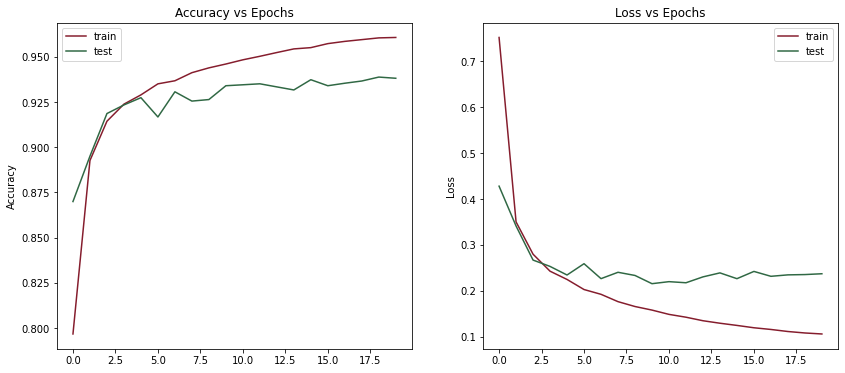

In [23]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(20)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history_B.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history_B.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history_B.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history_B.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.show()

# **PART B - ACTIVATION FUNCTION (10 POINTS)**

On your Deep Learning model data Change the activation function. How does it affect accuracy? How does it affect how quickly the network plateaus?

In [24]:
# the activation function is changed from relu to Leaky Relu

model_C = Sequential()
model_C.add(Conv2D(128, (5, 5), activation='leaky_relu', input_shape=(28, 28,1)))
model_C.add(MaxPooling2D((2, 2)))

model_C.add(Conv2D(64, (3, 3), activation='leaky_relu'))
model_C.add(MaxPooling2D((2, 2)))

model_C.add(Flatten())
model_C.add(Dense(64, activation='leaky_relu'))
model_C.add(Dense(32, activation='leaky_relu'))
model_C.add(Dense(df["labels"].nunique(), activation='softmax'))

opt = Adam()
model_C.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_C.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       3328      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_7 (Dense)             (None, 64)               

In [25]:
x_train_norm=x_train_norm.reshape((x_train_norm.shape[0],28,28,1))
x_test_norm=x_test_norm.reshape((x_test_norm.shape[0],28,28,1))

In [26]:
tensorboard_C = TensorBoard(log_dir = 'Visualisation/{}'.format('ModelC'+ str(time())))

In [27]:
model_history_C=model_C.fit(x_train_norm, y_train_encoded, epochs=20, validation_data=(x_test_norm, y_test_encoded), 
                           verbose=1,batch_size=128, callbacks = tensorboard_C)

Epoch 1/20
1607/1607 [==============================] - 18s 11ms/step - loss: 0.6828 - accuracy: 0.8129 - val_loss: 0.3766 - val_accuracy: 0.8830
Epoch 2/20
1607/1607 [==============================] - 15s 10ms/step - loss: 0.3183 - accuracy: 0.9017 - val_loss: 0.2815 - val_accuracy: 0.9148
Epoch 3/20
1607/1607 [==============================] - 16s 10ms/step - loss: 0.2591 - accuracy: 0.9193 - val_loss: 0.2575 - val_accuracy: 0.9184
Epoch 4/20
1607/1607 [==============================] - 16s 10ms/step - loss: 0.2295 - accuracy: 0.9275 - val_loss: 0.2426 - val_accuracy: 0.9259
Epoch 5/20
1607/1607 [==============================] - 16s 10ms/step - loss: 0.2087 - accuracy: 0.9321 - val_loss: 0.2245 - val_accuracy: 0.9308
Epoch 6/20
1607/1607 [==============================] - 16s 10ms/step - loss: 0.1918 - accuracy: 0.9369 - val_loss: 0.2250 - val_accuracy: 0.9321
Epoch 7/20
1607/1607 [==============================] - 16s 10ms/step - loss: 0.1791 - accuracy: 0.9399 - val_loss: 0.2291 -

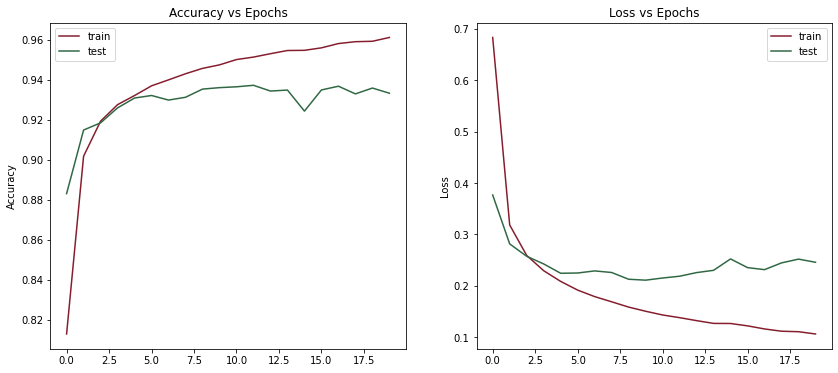

In [28]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(20)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history_C.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history_C.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history_C.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history_C.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.show()

**It can be concluded from the above plots that as compared to model A, model B work better till epochs 3 when activation function is changed from 'relu' to 'leaky_relu', but model A works better till epoch 20 in terms of accuracy.**

## **PART C - COST FUNCTION**
Change the cost function. How does it affect accuracy? How does it affect how quickly the network plateaus?

In [29]:
# the cost function is changed from cross entropy to cosine proximity

model_D = Sequential()
model_D.add(Conv2D(128, (5, 5), activation='leaky_relu', input_shape=(28, 28,1)))
model_D.add(MaxPooling2D((2, 2)))

model_D.add(Conv2D(64, (3, 3), activation='leaky_relu'))
model_D.add(MaxPooling2D((2, 2)))

model_D.add(Flatten())
model_D.add(Dense(64, activation='leaky_relu'))
model_D.add(Dense(32, activation='leaky_relu'))
model_D.add(Dense(df["labels"].nunique(), activation='softmax'))

opt = Adam()
model_D.compile(optimizer=opt, loss='kullback_leibler_divergence', metrics=['accuracy'])
model_D.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 128)       3328      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 64)        73792     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_10 (Dense)            (None, 64)               

In [30]:
tensorboard_D = TensorBoard(log_dir = 'Visualisation/{}'.format('ModelD'+ str(time())))

In [31]:
model_history_D=model_D.fit(x_train_norm, y_train_encoded, epochs=20, validation_data=(x_test_norm, y_test_encoded), 
                           verbose=1,batch_size=128, callbacks = tensorboard_D)

Epoch 1/20
1607/1607 [==============================] - 17s 10ms/step - loss: 0.6781 - accuracy: 0.8132 - val_loss: 0.3892 - val_accuracy: 0.8804
Epoch 2/20
1607/1607 [==============================] - 16s 10ms/step - loss: 0.3185 - accuracy: 0.9022 - val_loss: 0.2901 - val_accuracy: 0.9115
Epoch 3/20
1607/1607 [==============================] - 18s 11ms/step - loss: 0.2599 - accuracy: 0.9190 - val_loss: 0.2745 - val_accuracy: 0.9167
Epoch 4/20
1607/1607 [==============================] - 16s 10ms/step - loss: 0.2338 - accuracy: 0.9261 - val_loss: 0.2649 - val_accuracy: 0.9153
Epoch 5/20
1607/1607 [==============================] - 15s 10ms/step - loss: 0.2089 - accuracy: 0.9325 - val_loss: 0.2268 - val_accuracy: 0.9300
Epoch 6/20
1607/1607 [==============================] - 16s 10ms/step - loss: 0.1923 - accuracy: 0.9363 - val_loss: 0.2451 - val_accuracy: 0.9219
Epoch 7/20
1607/1607 [==============================] - 16s 10ms/step - loss: 0.1807 - accuracy: 0.9395 - val_loss: 0.2566 -

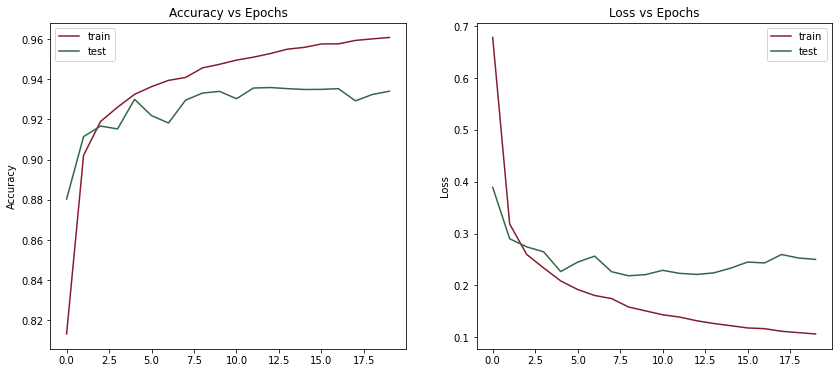

In [32]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(20)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history_D.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history_D.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history_D.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history_D.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.show()

As compared to loss function "cross entropy", "kullback_leibler_divergence" work better only till epoch 1, but cross entropy work better till epochs 20

## **PART D - EPOCHS**
On your Deep Learning model data change the number of epochs initialization. How does it affect accuracy? How quickly does the network plateau?

In [33]:
model_history_D=model_D.fit(x_train_norm, y_train_encoded, epochs=40, validation_data=(x_test_norm, y_test_encoded), 
                           verbose=2,batch_size=128, callbacks = tensorboard_D)

Epoch 1/40
1607/1607 - 16s - loss: 0.1041 - accuracy: 0.9620 - val_loss: 0.2467 - val_accuracy: 0.9356 - 16s/epoch - 10ms/step
Epoch 2/40
1607/1607 - 14s - loss: 0.1007 - accuracy: 0.9627 - val_loss: 0.2578 - val_accuracy: 0.9347 - 14s/epoch - 9ms/step
Epoch 3/40
1607/1607 - 14s - loss: 0.0986 - accuracy: 0.9638 - val_loss: 0.2646 - val_accuracy: 0.9334 - 14s/epoch - 9ms/step
Epoch 4/40
1607/1607 - 14s - loss: 0.0976 - accuracy: 0.9639 - val_loss: 0.2710 - val_accuracy: 0.9352 - 14s/epoch - 9ms/step
Epoch 5/40
1607/1607 - 14s - loss: 0.0955 - accuracy: 0.9646 - val_loss: 0.2784 - val_accuracy: 0.9319 - 14s/epoch - 9ms/step
Epoch 6/40
1607/1607 - 14s - loss: 0.0945 - accuracy: 0.9646 - val_loss: 0.2713 - val_accuracy: 0.9322 - 14s/epoch - 9ms/step
Epoch 7/40
1607/1607 - 14s - loss: 0.0903 - accuracy: 0.9663 - val_loss: 0.2764 - val_accuracy: 0.9344 - 14s/epoch - 9ms/step
Epoch 8/40
1607/1607 - 14s - loss: 0.0907 - accuracy: 0.9663 - val_loss: 0.2882 - val_accuracy: 0.9342 - 14s/epoch - 

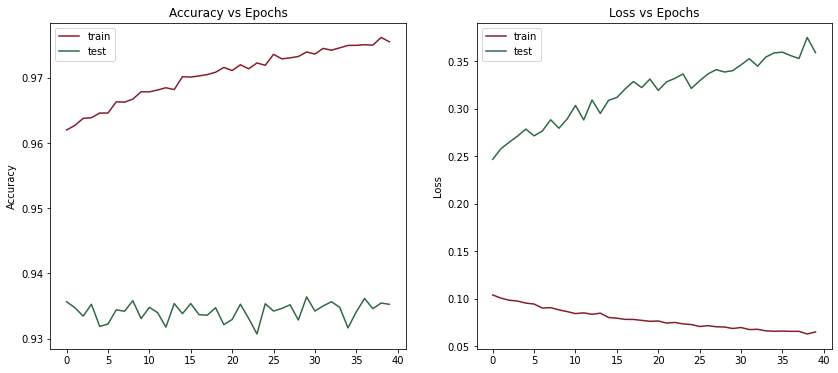

In [34]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(40)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history_D.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history_D.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history_D.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history_D.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.show()

The accuracy of the model has increased when the number of epochs are increased

# **PART E - GRADIENT ESTIMATION**
On your Deep Learning model

Change the gradient estimation. How does it affect accuracy? How does it affect how quickly the network plateaus? Various forms of gradient estimation:

In [35]:
# changing gradient estimation from Adam from SGD-Stochastic Gradient Descent

model_E = Sequential()
model_E.add(Conv2D(128, (5, 5), activation='relu', input_shape=(28, 28,1)))
model_E.add(MaxPooling2D((2, 2)))

model_E.add(Conv2D(64, (3, 3), activation='relu'))
model_E.add(MaxPooling2D((2, 2)))

model_E.add(Flatten())
model_E.add(Dense(64, activation='relu'))
model_E.add(Dense(32, activation='relu'))
model_E.add(Dense(df["labels"].nunique(), activation='softmax'))

model_E.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model_E.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 128)       3328      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        73792     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_13 (Dense)            (None, 64)               

In [36]:
tensorboard_E = TensorBoard(log_dir = 'Visualisation/{}'.format('ModelE'+ str(time())))

In [37]:
model_history_E=model_E.fit(x_train_norm, y_train_encoded, epochs=20, validation_data=(x_test_norm, y_test_encoded), 
                           verbose=1,batch_size=128, callbacks = tensorboard_E)

Epoch 1/20
1607/1607 [==============================] - 17s 10ms/step - loss: 4.0074 - accuracy: 0.1135 - val_loss: 10.8428 - val_accuracy: 0.0341
Epoch 2/20
1607/1607 [==============================] - 16s 10ms/step - loss: 1.1369 - accuracy: 0.7025 - val_loss: 0.8260 - val_accuracy: 0.7808
Epoch 3/20
1607/1607 [==============================] - 16s 10ms/step - loss: 0.7534 - accuracy: 0.7971 - val_loss: 2.6929 - val_accuracy: 0.5778
Epoch 4/20
1607/1607 [==============================] - 16s 10ms/step - loss: 0.6405 - accuracy: 0.8224 - val_loss: 0.5860 - val_accuracy: 0.8355
Epoch 5/20
1607/1607 [==============================] - 15s 9ms/step - loss: 0.5670 - accuracy: 0.8380 - val_loss: 0.5424 - val_accuracy: 0.8444
Epoch 6/20
1607/1607 [==============================] - 16s 10ms/step - loss: 0.5188 - accuracy: 0.8484 - val_loss: 0.4972 - val_accuracy: 0.8540
Epoch 7/20
1607/1607 [==============================] - 16s 10ms/step - loss: 0.4850 - accuracy: 0.8551 - val_loss: 1.3060 -

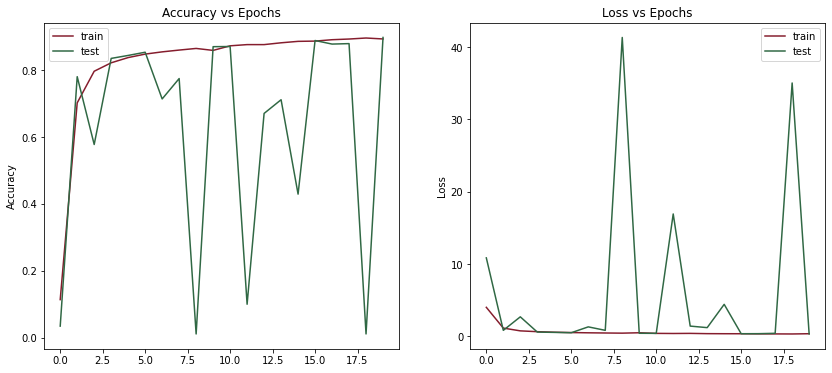

In [38]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(20)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history_E.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history_E.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history_E.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history_E.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.show()

Accuracy is decreased by changing the optimizer from Adam to Stochastic Gradient Descent

# **PART F - NETWORK ARCHITECTURE**
On your Deep Learning model change the network architecture. How does it affect accuracy? How does it affect how quickly the network plateaus?

In [11]:
model_F = Sequential()
model_F.add(Conv2D(128, (5, 5), activation='relu', input_shape=(28, 28,1)))
model_F.add(MaxPooling2D((2, 2)))

model_F.add(Conv2D(64, (3, 3), activation='relu'))
model_F.add(MaxPooling2D((2, 2)))

model_F.add(Flatten())
model_F.add(Dense(32, activation='relu'))
model_F.add(Dense(df["labels"].nunique(), activation='softmax'))

model_F.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model_F.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       3328      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 32)               

In [12]:
tensorboard_F = TensorBoard(log_dir = 'Visualisation/{}'.format('ModelF'+ str(time())))

In [13]:
model_history_F=model_F.fit(x_train_norm, y_train_encoded, epochs=20, validation_data=(x_test_norm, y_test_encoded), 
                           verbose=1,batch_size=128, callbacks = tensorboard_F)

Epoch 1/20
1607/1607 [==============================] - 25s 11ms/step - loss: 0.7628 - accuracy: 0.7970 - val_loss: 0.4826 - val_accuracy: 0.8573
Epoch 2/20
1607/1607 [==============================] - 15s 9ms/step - loss: 0.3634 - accuracy: 0.8907 - val_loss: 0.3057 - val_accuracy: 0.9100
Epoch 3/20
1607/1607 [==============================] - 15s 9ms/step - loss: 0.2819 - accuracy: 0.9155 - val_loss: 0.2677 - val_accuracy: 0.9199
Epoch 4/20
1607/1607 [==============================] - 15s 9ms/step - loss: 0.2455 - accuracy: 0.9245 - val_loss: 0.3529 - val_accuracy: 0.8922
Epoch 5/20
1607/1607 [==============================] - 16s 10ms/step - loss: 0.2244 - accuracy: 0.9296 - val_loss: 0.2410 - val_accuracy: 0.9268
Epoch 6/20
1607/1607 [==============================] - 15s 9ms/step - loss: 0.2040 - accuracy: 0.9348 - val_loss: 0.2380 - val_accuracy: 0.9275
Epoch 7/20
1607/1607 [==============================] - 16s 10ms/step - loss: 0.1907 - accuracy: 0.9378 - val_loss: 0.2270 - val

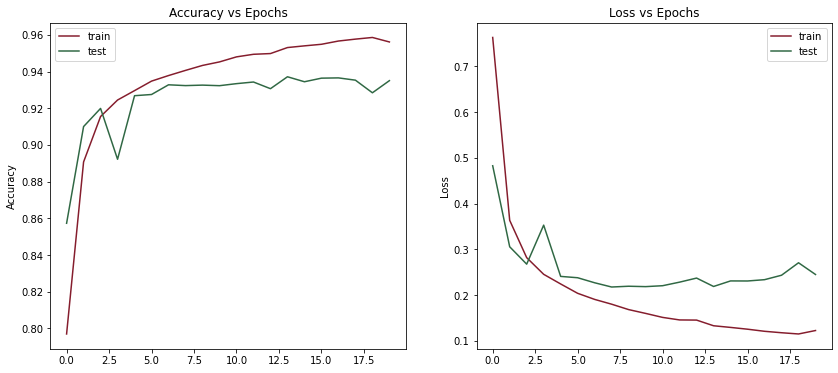

In [14]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(20)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history_F.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history_F.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history_F.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history_F.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.show()

After changing network architecture, accuracy has been decreased significantly

# **PART G - NETWORK INITIALIZATION**
On your Deep Learning model

Change the network initialization. How does it affect accuracy? How does it affect how quickly the network plateaus?

In [15]:
# changing gradient estimation from Adam from SGD-Stochastic Gradient Descent

model_G = Sequential()
model_G.add(Conv2D(128, (5, 5), activation='relu', input_shape=(28, 28,1)))
model_G.add(MaxPooling2D((2, 2)))

model_G.add(Conv2D(64, (3, 3), activation='relu'))
model_G.add(MaxPooling2D((2, 2)))

model_G.add(Flatten())
model_G.add(Dense(64, activation='relu'))
model_G.add(Dense(32, activation='relu'))
model_G.add(Dense(df["labels"].nunique(), activation='softmax',kernel_initializer=tf.keras.initializers.GlorotNormal))

model_G.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model_G.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 128)       3328      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 64)        73792     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [16]:
tensorboard_G = TensorBoard(log_dir = 'Visualisation/{}'.format('ModelG'+ str(time())))

In [17]:
model_history_G = model_G.fit(x_train_norm, y_train_encoded, epochs=20, validation_data=(x_test_norm, y_test_encoded), 
                           verbose=1,batch_size=128, callbacks = tensorboard_G)

Epoch 1/20
1607/1607 [==============================] - 18s 11ms/step - loss: 0.7845 - accuracy: 0.7880 - val_loss: 0.4035 - val_accuracy: 0.8761
Epoch 2/20
1607/1607 [==============================] - 16s 10ms/step - loss: 0.3601 - accuracy: 0.8876 - val_loss: 0.2977 - val_accuracy: 0.9139
Epoch 3/20
1607/1607 [==============================] - 16s 10ms/step - loss: 0.2799 - accuracy: 0.9134 - val_loss: 0.2720 - val_accuracy: 0.9185
Epoch 4/20
1607/1607 [==============================] - 15s 10ms/step - loss: 0.2406 - accuracy: 0.9243 - val_loss: 0.2449 - val_accuracy: 0.9245
Epoch 5/20
1607/1607 [==============================] - 15s 9ms/step - loss: 0.2162 - accuracy: 0.9306 - val_loss: 0.2346 - val_accuracy: 0.9284
Epoch 6/20
1607/1607 [==============================] - 15s 10ms/step - loss: 0.1965 - accuracy: 0.9358 - val_loss: 0.2259 - val_accuracy: 0.9309
Epoch 7/20
1607/1607 [==============================] - 15s 9ms/step - loss: 0.1824 - accuracy: 0.9388 - val_loss: 0.2390 - v

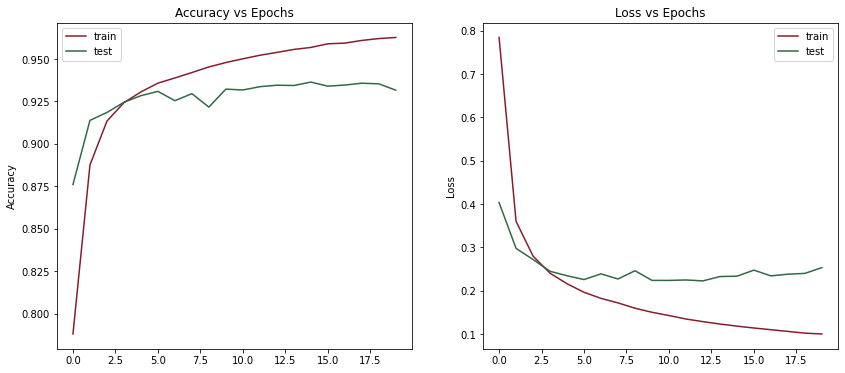

In [18]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(20)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history_G.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history_G.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history_G.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history_G.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.show()